## Test GAIA DR2

Test to search for specific data in DR2. <br>
Note that gaia-on-tap is by default for DR1 <br>

In [33]:
import astropy.coordinates as coord
import matplotlib.pyplot as plt
from pylab import rcParams

from gaia.tap import cone_search

%matplotlib inline

### OC selection 

In [34]:
cluster = coord.SkyCoord.from_name("M67")

# cluster = coord.SkyCoord.from_name("NGC2287")

# cluster = coord.SkyCoord.from_name("M44")


# Get everything within 1 degree radius of the cluster.
cluster_candidates = cone_search(cluster.ra.deg, cluster.dec.deg, 0.5, table="gaiadr2.gaia_source")

# cluster_candidates.info()

if len(cluster_candidates) == 0:
    print("## No data...")


### Plots ...

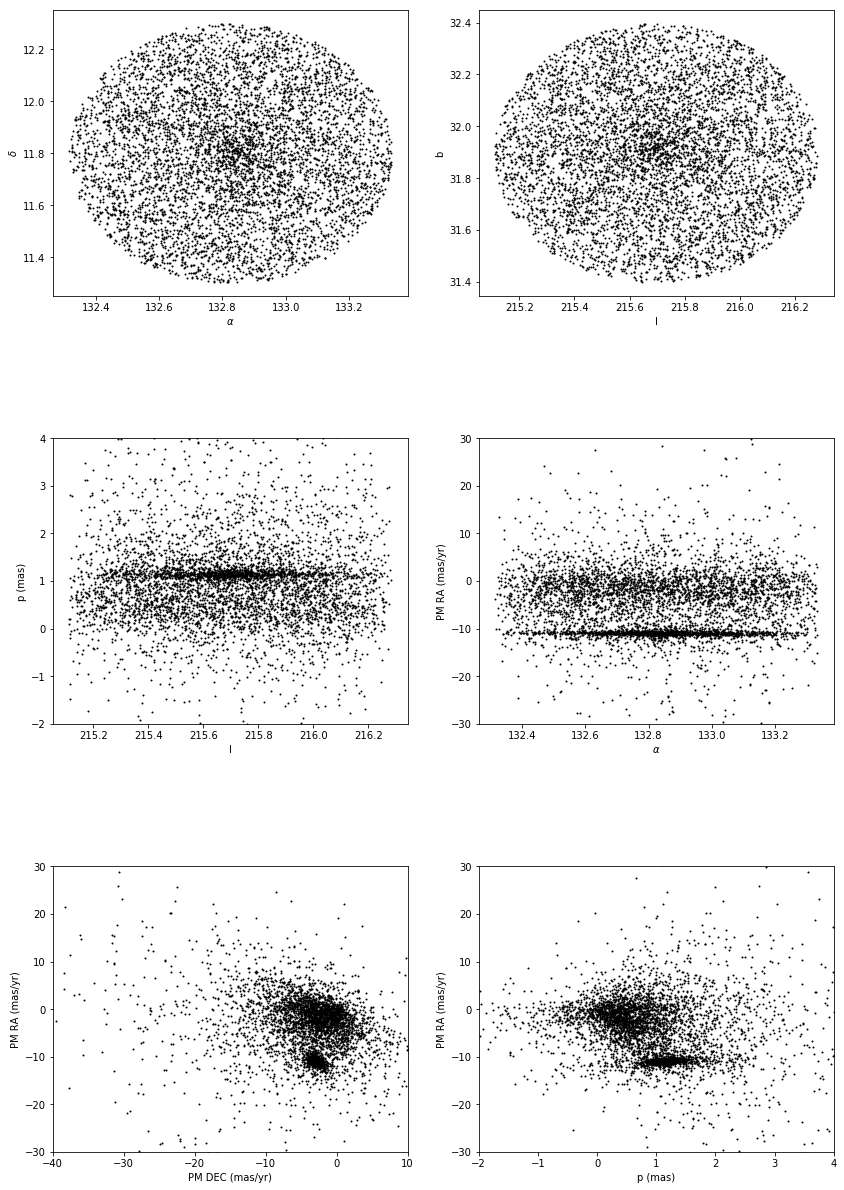

In [35]:
# Plot of different space parameters
rcParams['figure.figsize'] = 14, 21
f, axarr = plt.subplots(3, 2)

# ax.scatter(cluster_candidates["ra"], cluster_candidates["dec"], s=1, c="#000000")
axarr[0,0].scatter(cluster_candidates["ra"], cluster_candidates["dec"], s=1, c="#000000")
axarr[0,0].set_xlabel(r"$\alpha$")
axarr[0,0].set_ylabel(r"$\delta$")

axarr[0,1].scatter(cluster_candidates["l"], cluster_candidates["b"], s=1, c="#000000")
axarr[0,1].set_xlabel(r"l")
axarr[0,1].set_ylabel(r"b")

axarr[1,0].scatter(cluster_candidates["l"], cluster_candidates["parallax"], s=1, c="#000000")
axarr[1,0].set_xlabel(r"l")
axarr[1,0].set_ylabel(r"p (mas)")
axarr[1,0].set_ylim([-2,4])

axarr[1,1].scatter(cluster_candidates["ra"], cluster_candidates["pmra"], s=1, c="#000000")
axarr[1,1].set_xlabel(r"$\alpha$")
axarr[1,1].set_ylabel(r"PM RA (mas/yr)")
axarr[1,1].set_ylim([-30,30])

axarr[2,0].scatter(cluster_candidates["pmdec"], cluster_candidates["pmra"], s=1, c="#000000")
axarr[2,0].set_xlabel(r"PM DEC (mas/yr)")
axarr[2,0].set_ylabel(r"PM RA (mas/yr)")
axarr[2,0].set_xlim([-40,10])
axarr[2,0].set_ylim([-30,30])

axarr[2,1].scatter(cluster_candidates["parallax"], cluster_candidates["pmra"], s=1, c="#000000")
axarr[2,1].set_xlabel(r"p (mas)")
axarr[2,1].set_ylabel(r"PM RA (mas/yr)")
axarr[2,1].set_xlim([-2,4])
axarr[2,1].set_ylim([-30,30])

f.subplots_adjust(hspace=0.5)
plt.show()